In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
cpi = 'CPI.csv' # Consumer price index
eci = 'ECI.csv' #  Employment cost index
csi = 'CONSUMER-SENTIMENT-INDEX.csv' # Consumer sentiment index
gpd = 'GPD-PRICE-DEFLATOR.csv' # Price deflator
ipd = 'IMPORT-PRICE-INDEX.csv' # Import price index
op = 'OIL-PRICE.csv' # WPI oil prices
pce = 'PCE.csv' # Personal consumption expenditures
ppi = 'PPI.csv' # Producer price index
wg = 'WAGE-GROWTH.csv' # Wage growth

In [75]:
# loading data and convert to datetime then set it as index
df_cpi = pd.read_csv('CPI.csv', index_col='DATE', parse_dates=True)
df_eci = pd.read_csv('ECI.csv', index_col='DATE', parse_dates=True)
df_csi = pd.read_csv('UMCSENT.csv',index_col='DATE', parse_dates=True)
df_gpd = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True)
df_ipi = pd.read_csv('IMPORT-PRICE-INDEX.csv', index_col='DATE', parse_dates=True)
df_op = pd.read_csv('OIL-PRICE.csv', index_col='DATE', parse_dates=True)
df_pce = pd.read_csv('PCE.csv', index_col='DATE', parse_dates=True)
df_ppi = pd.read_csv('PPI.csv', index_col='DATE', parse_dates=True)
df_wg = pd.read_csv('WAGE-GROWTH.csv', index_col='DATE', parse_dates=True)


In [76]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [77]:
df_csi


,UMCSENT
DATE,
1952-11-01,86.2
1952-12-01,.
1953-01-01,.
1953-02-01,90.7
1953-03-01,.
...,...
2024-01-01,79
2024-02-01,76.9
2024-03-01,79.4


In [78]:
df_csi.replace('.', np.nan, inplace=True)
df_csi.isnull().sum()

UMCSENT    210
dtype: int64

In [79]:
df_csi.dropna(inplace=True)

In [80]:
df_csi['UMCSENT'] = df_csi['UMCSENT'].astype("float64")

In [81]:
df_csi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 649 entries, 1952-11-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   UMCSENT  649 non-null    float64
dtypes: float64(1)
memory usage: 10.1 KB


In [82]:
check_outliers(df_csi, 'UMCSENT')

,UMCSENT
DATE,


In [83]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 1947-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  929 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


In [84]:
check_outliers(df_cpi, 'CPIAUCSL')

,CPIAUCSL
DATE,


In [85]:
df_eci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CIS1020000000000I  93 non-null     float64
dtypes: float64(1)
memory usage: 1.5 KB


In [86]:
df_eci.head()

,CIS1020000000000I
DATE,
2001-01-01,87.6
2001-04-01,88.4
2001-07-01,89.2
2001-10-01,90.0
2002-01-01,90.7


In [87]:
check_outliers(df_eci,'CIS1020000000000I' )

,CIS1020000000000I
DATE,


In [88]:
df_cpi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 929 entries, 1947-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  929 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


In [89]:
check_outliers(df_cpi,'CPIAUCSL' )

,CPIAUCSL
DATE,


In [90]:
df_cpi.resample("Q").mean()

,CPIAUCSL
DATE,
1947-03-31,21.700000
1947-06-30,22.010000
1947-09-30,22.490000
1947-12-31,23.126667
1948-03-31,23.616667
...,...
2023-06-30,303.466667
2023-09-30,306.034333
2023-12-31,308.099000


In [95]:
df_ipi


,IR
DATE,
1982-09-01,80.0
1982-10-01,.
1982-11-01,.
1982-12-01,79.9
1983-01-01,.
...,...
2024-01-01,139.4
2024-02-01,139.7
2024-03-01,140.5


In [99]:
df_ipi.replace('.', np.nan, inplace=True)

In [100]:
df_ipi.isnull().sum()

IR    50
dtype: int64

In [101]:
df_ipi.dropna(inplace=True)

In [103]:
df_ipi['IR'] = df_ipi['IR'].astype('float64')

In [104]:
check_outliers(df_ipi, 'IR')

,IR
DATE,


In [106]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 1990-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POILWTIUSDM  413 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [107]:
check_outliers(df_op, 'POILWTIUSDM')

,POILWTIUSDM
DATE,


In [108]:
df_pce

,PCE
DATE,
1959-01-01,306.1
1959-02-01,309.6
1959-03-01,312.7
1959-04-01,312.2
1959-05-01,316.1
...,...
2024-01-01,19028.0
2024-02-01,19136.0
2024-03-01,19263.7


In [109]:
df_pce.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 785 entries, 1959-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCE     785 non-null    float64
dtypes: float64(1)
memory usage: 12.3 KB


In [110]:
check_outliers(df_pce, 'PCE')

,PCE
DATE,


In [111]:
df_ppi

,PPIACO
DATE,
1913-01-01,12.100
1913-02-01,12.000
1913-03-01,12.000
1913-04-01,12.000
1913-05-01,11.900
...,...
2024-01-01,251.306
2024-02-01,254.914
2024-03-01,255.116


In [112]:
df_ppi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337 entries, 1913-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPIACO  1337 non-null   float64
dtypes: float64(1)
memory usage: 20.9 KB


In [113]:
check_outliers(df_ppi, 'PPIACO')

,PPIACO
DATE,


In [114]:
df_wg

,FRBATLWGTUMHWG83O
DATE,
1983-01-01,6.5
1983-02-01,6.1
1983-03-01,5.7
1983-04-01,5.7
1983-05-01,5.8
...,...
2023-11-01,5.1
2023-12-01,5.4
2024-01-01,4.7


In [115]:
df_wg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 495 entries, 1983-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FRBATLWGTUMHWG83O  495 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [117]:
df_wg.replace('.',np.nan, inplace=True)

In [118]:
df_wg.isnull().sum()

FRBATLWGTUMHWG83O    30
dtype: int64

In [120]:
df_wg.dropna(inplace=True)

In [121]:
df_wg['FRBATLWGTUMHWG83O'] = df_wg['FRBATLWGTUMHWG83O'].astype('float64')

In [122]:
check_outliers(df_wg, 'FRBATLWGTUMHWG83O')

,FRBATLWGTUMHWG83O
DATE,


In [125]:
df_gpd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 308 entries, 1947-04-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   A191RI1Q225SBEA_NBD19470401  308 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


In [126]:
check_outliers(df_gpd, 'A191RI1Q225SBEA_NBD19470401')

,A191RI1Q225SBEA_NBD19470401
DATE,
1947-10-01,175.86207
1949-04-01,-68.96552
1950-07-01,155.17241
1951-01-01,262.06897
1973-10-01,141.37931
1974-04-01,168.96552
1974-07-01,212.06897
1974-10-01,212.06897
1975-01-01,162.06897


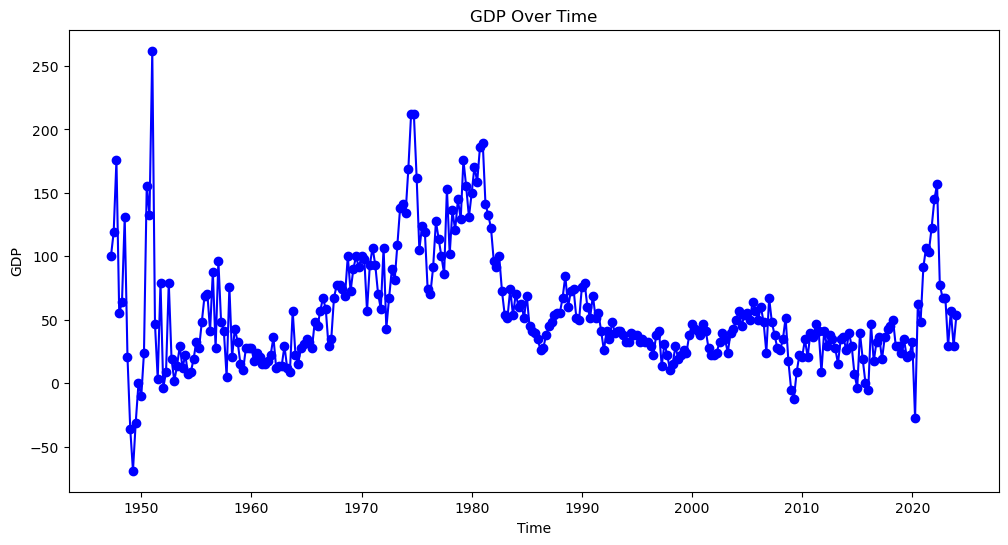

In [127]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df_gpd, marker='o', linestyle='-', color='b')
plt.title('GDP Over Time')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.show()

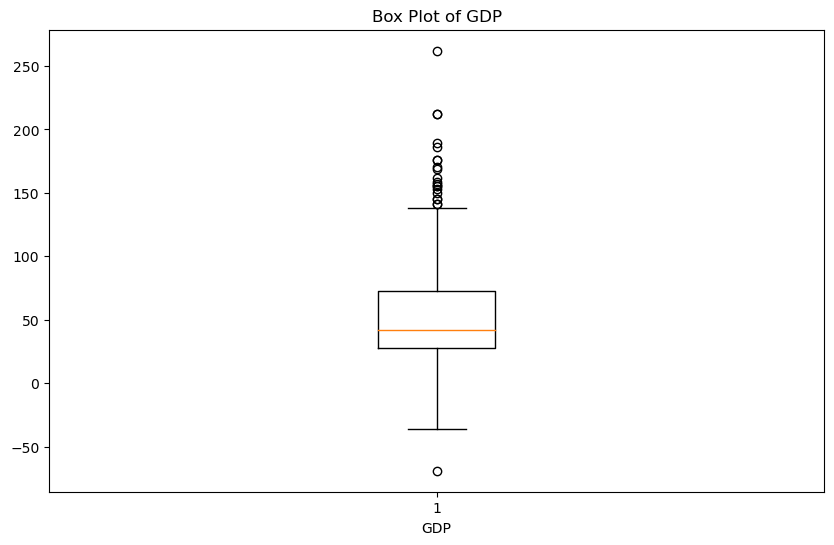

In [133]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_gpd)
plt.title('Box Plot of GDP')
plt.xlabel('GDP')
plt.show()

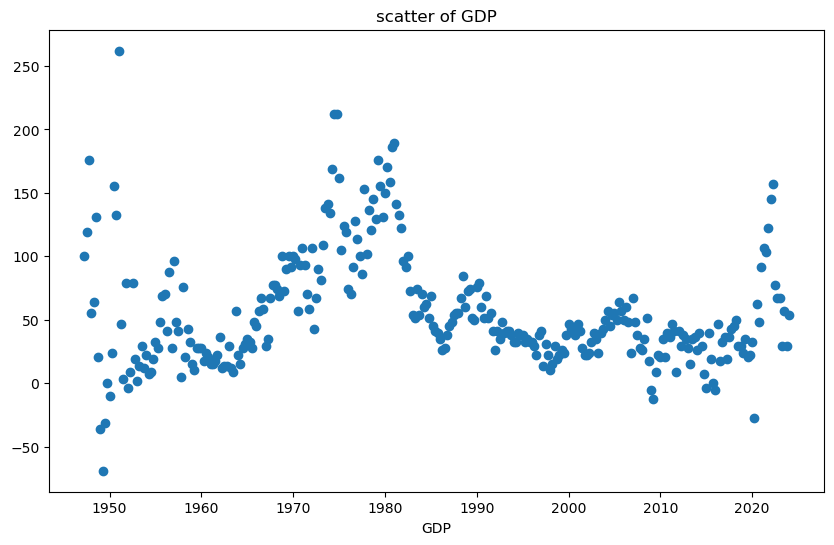

In [156]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_gpd.index,df_gpd.values)
plt.title('scatter of GDP')
plt.xlabel('GDP')
plt.show()

In [164]:
df_gpd.describe()


,A191RI1Q225SBEA_NBD19470401
count,308.000000
mean,55.441110
std,45.049791
min,-68.965520
25%,27.586210
50%,42.241380
75%,72.413790
max,262.068970


In [ ]:
# loading data and convert to datetime then set it as index
df_cpi = pd.read_csv('CPI.csv', index_col='DATE', parse_dates=True)
df_eci = pd.read_csv('ECI.csv', index_col='DATE', parse_dates=True)
df_csi = pd.read_csv('UMCSENT.csv',index_col='DATE', parse_dates=True)
df_gpd = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True)
df_ipi = pd.read_csv('IMPORT-PRICE-INDEX.csv', index_col='DATE', parse_dates=True)
df_op = pd.read_csv('OIL-PRICE.csv', index_col='DATE', parse_dates=True)
df_pce = pd.read_csv('PCE.csv', index_col='DATE', parse_dates=True)
df_ppi = pd.read_csv('PPI.csv', index_col='DATE', parse_dates=True)
df_wg = pd.read_csv('WAGE-GROWTH.csv', index_col='DATE', parse_dates=True)


In [169]:
df_merge = df_eci.join([df_cpi, df_csi,df_gpd,df_ipi,df_op,df_pce,df_ppi,df_wg])
df_merge

,CIS1020000000000I,CPIAUCSL,UMCSENT,A191RI1Q225SBEA_NBD19470401,IR,POILWTIUSDM,PCE,PPIACO,FRBATLWGTUMHWG83O
DATE,,,,,,,,,
2001-01-01,87.6,175.600,94.7,46.55172,100.5,29.482174,6987.4,140.000,5.3
2001-04-01,88.4,176.400,88.4,41.37931,97.8,27.453810,7004.2,136.400,5.4
2001-07-01,89.2,177.400,92.4,27.58621,96.1,26.435909,7082.3,133.400,5.1
2001-10-01,90.0,177.600,82.7,22.41379,93.7,22.210435,7212.9,130.300,5.1
2002-01-01,90.7,177.700,93.0,22.41379,91.6,19.607391,7184.6,128.500,4.8
...,...,...,...,...,...,...,...,...,...
2023-01-01,157.1,300.356,64.9,67.24138,141.3,78.251364,18229.6,260.227,6.2
2023-04-01,158.7,303.032,63.7,29.31034,140.3,79.126500,18363.8,256.908,5.1
2023-07-01,160.4,304.628,71.5,56.89655,139.4,75.766667,18595.4,253.835,5.3


In [170]:
df_merge.columns = ['ECI', 'CPI', 'CSI', 'GDP', 'IPI','OP','PCE','PPI','WG']
df_merge

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2001-01-01,87.6,175.600,94.7,46.55172,100.5,29.482174,6987.4,140.000,5.3
2001-04-01,88.4,176.400,88.4,41.37931,97.8,27.453810,7004.2,136.400,5.4
2001-07-01,89.2,177.400,92.4,27.58621,96.1,26.435909,7082.3,133.400,5.1
2001-10-01,90.0,177.600,82.7,22.41379,93.7,22.210435,7212.9,130.300,5.1
2002-01-01,90.7,177.700,93.0,22.41379,91.6,19.607391,7184.6,128.500,4.8
...,...,...,...,...,...,...,...,...,...
2023-01-01,157.1,300.356,64.9,67.24138,141.3,78.251364,18229.6,260.227,6.2
2023-04-01,158.7,303.032,63.7,29.31034,140.3,79.126500,18363.8,256.908,5.1
2023-07-01,160.4,304.628,71.5,56.89655,139.4,75.766667,18595.4,253.835,5.3


In [171]:
df_merge.shape

(93, 9)

In [172]:
df_merge.tail(30)

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2016-10-01,126.7,241.741,87.2,32.75862,121.2,49.809524,12867.0,186.700,4.0
2017-01-01,127.5,243.618,98.5,36.20690,122.3,52.561818,13063.7,190.700,3.1
2017-04-01,128.3,244.193,97.0,18.96552,122.8,51.174000,13169.2,193.000,3.4
2017-07-01,129.2,244.243,93.4,36.20690,122.2,46.581905,13263.3,193.500,3.7
2017-10-01,130.0,246.626,100.7,43.10345,124.1,51.573182,13447.5,194.900,3.0
2018-01-01,131.0,248.859,95.7,44.82759,126.5,63.584783,13703.3,197.900,3.1
2018-04-01,131.8,250.227,98.8,50.00000,127.1,66.313810,13838.4,200.300,3.0
2018-07-01,132.9,251.214,97.9,29.31034,128.1,71.074545,13974.8,204.300,3.3
2018-10-01,133.9,252.772,98.6,29.31034,128.3,70.753043,14083.1,204.600,3.9


In [173]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2001-01-01 to 2024-01-01
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ECI     93 non-null     float64
 1   CPI     93 non-null     float64
 2   CSI     93 non-null     float64
 3   GDP     93 non-null     float64
 4   IPI     93 non-null     float64
 5   OP      93 non-null     float64
 6   PCE     93 non-null     float64
 7   PPI     93 non-null     float64
 8   WG      93 non-null     float64
dtypes: float64(9)
memory usage: 9.3 KB


In [176]:
df_merge[df_merge.duplicated() == True]

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,


In [178]:
df_merge.describe()

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,118.801075,229.169011,82.445161,39.803485,123.250538,64.805213,11615.189247,187.983667,3.589247
std,19.736600,34.408084,12.542714,28.709622,15.305907,25.607322,3163.797887,34.147023,1.108413
min,87.600000,175.600000,51.500000,-27.586210,91.600000,16.975000,6987.400000,128.500000,1.300000
25%,103.300000,202.900000,72.300000,24.137930,114.500000,46.581905,9393.600000,166.200000,3.000000
50%,116.200000,229.187000,84.700000,36.206900,125.100000,63.870455,11018.500000,190.900000,3.600000
75%,131.800000,250.227000,93.000000,50.000000,137.700000,84.497727,13703.300000,203.500000,4.100000
max,163.900000,309.685000,103.800000,156.896550,147.500000,133.958261,19028.000000,272.274000,6.300000


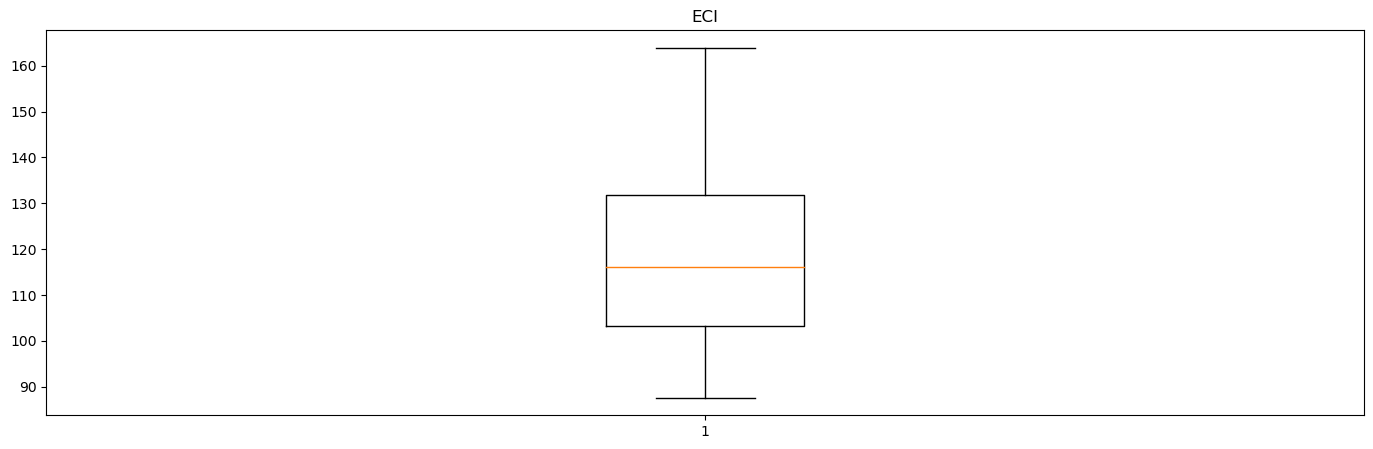

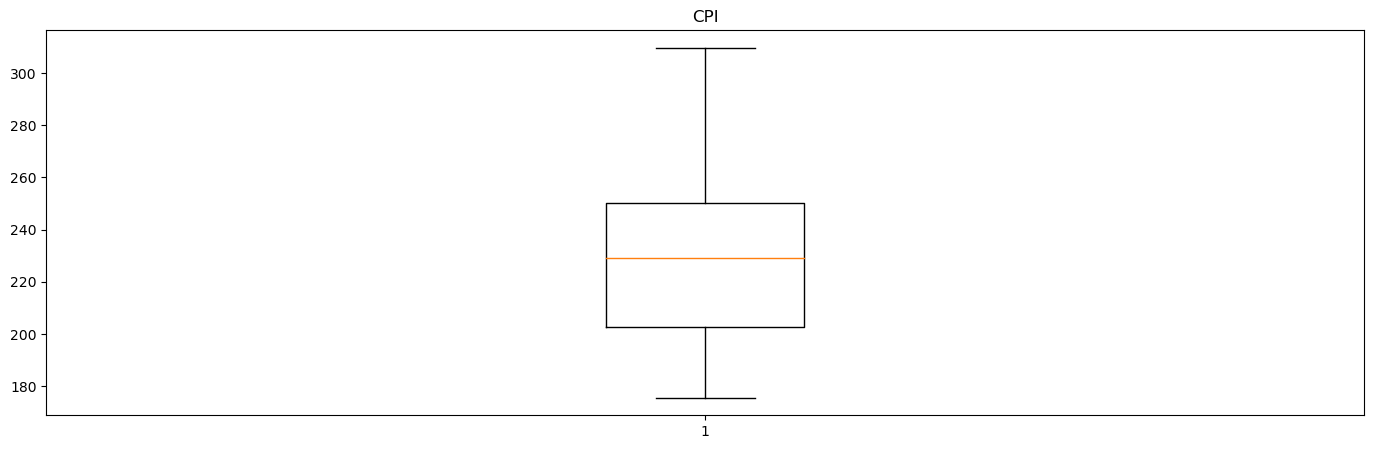

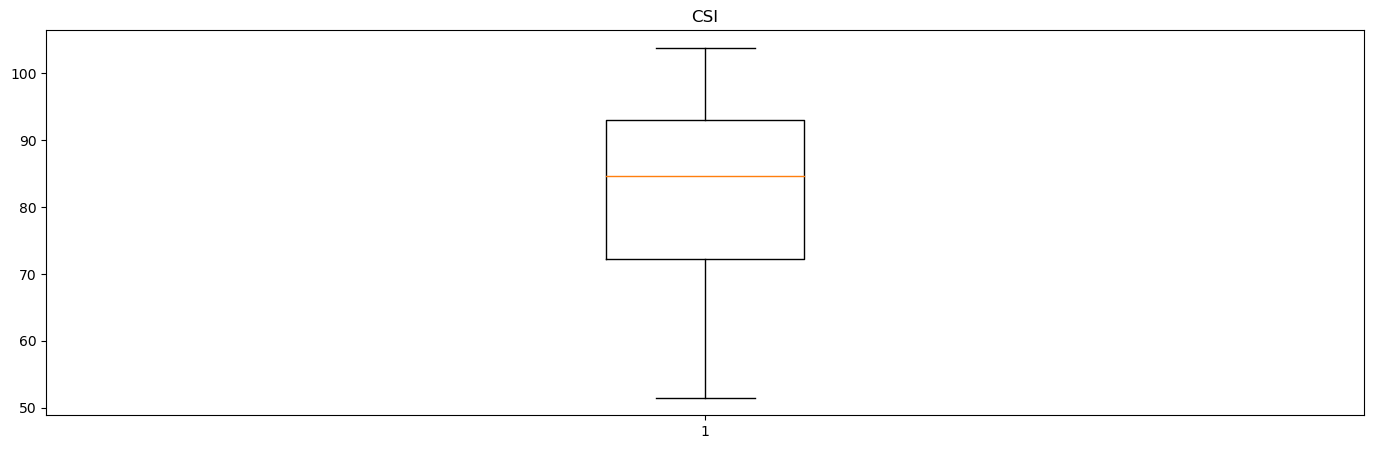

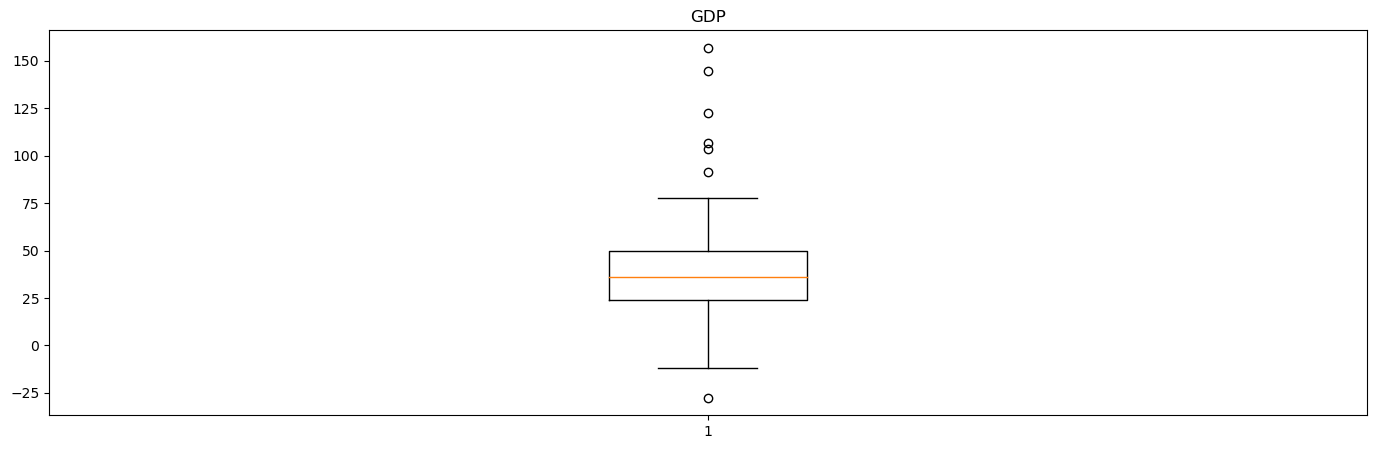

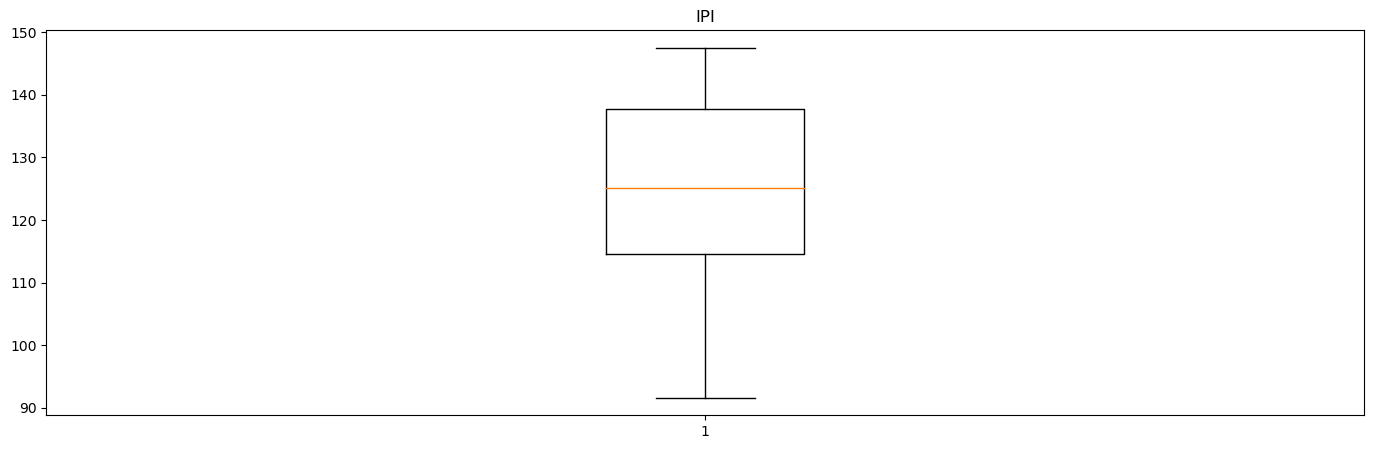

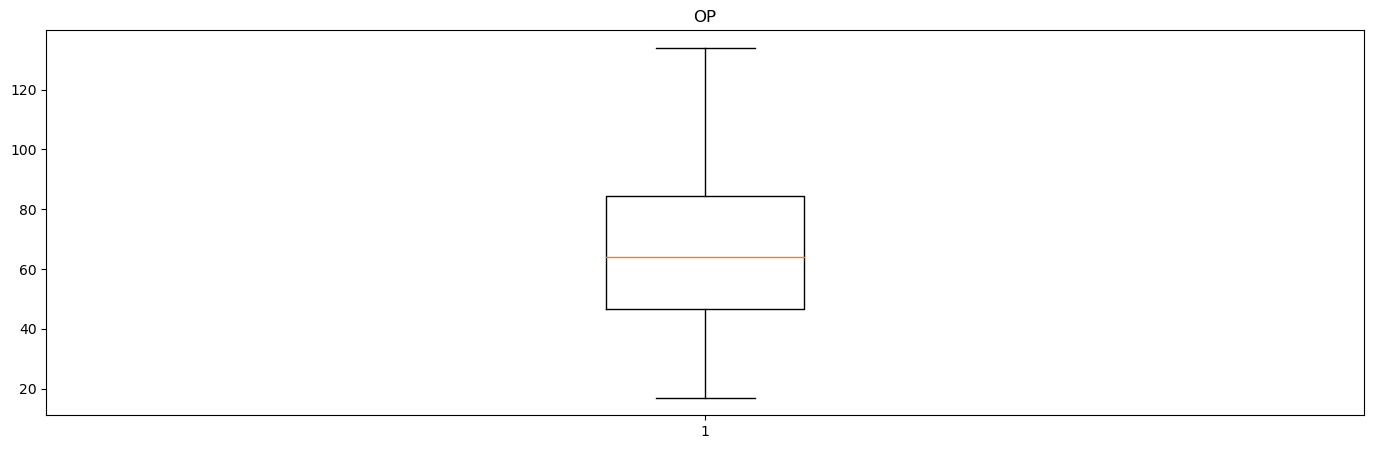

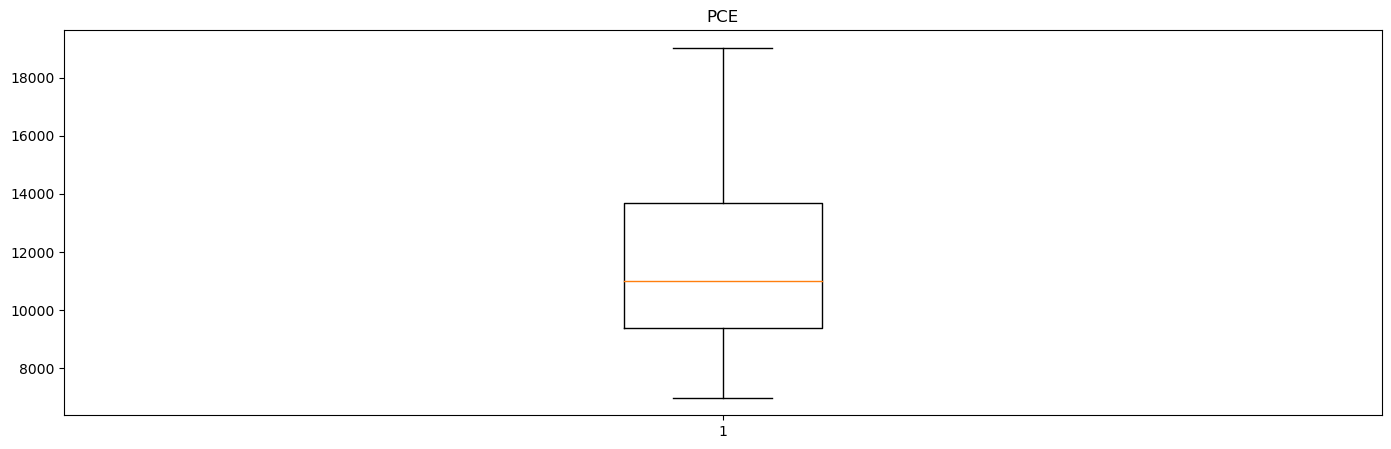

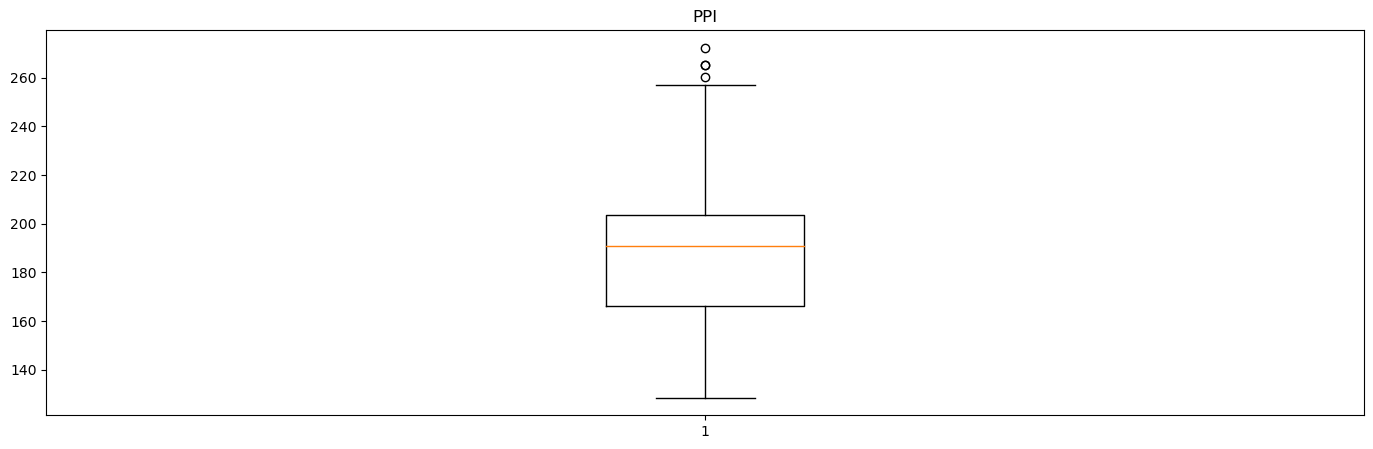

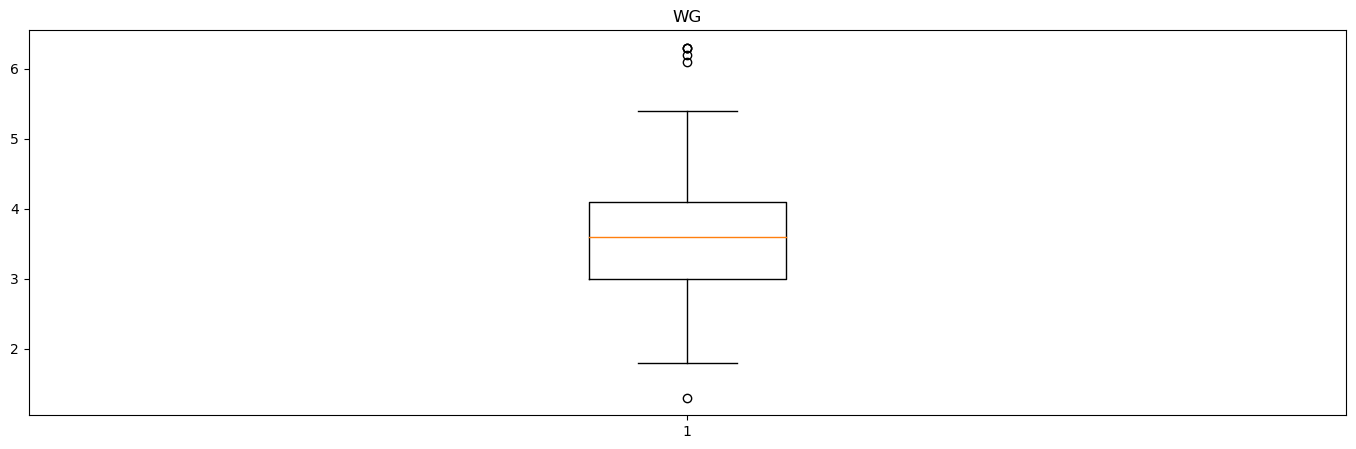

In [179]:
# plot box plot
for column in df_merge.columns:
    plt.figure(figsize=(17, 5))
    plt.boxplot(df_merge[column])
    plt.title(column.upper())
    plt.show()

In [181]:
check_outliers(df_merge, 'GDP')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2020-04-01,139.6,256.126,71.8,-27.58621,118.2,16.975000,12228.3,185.500,3.4
2021-01-01,142.9,262.518,79.0,91.37931,126.5,51.849524,15047.3,204.800,3.5
2021-04-01,144.1,266.752,88.3,106.89655,131.1,61.417727,15854.1,217.900,3.1
2021-07-01,146.1,271.994,81.2,103.44828,134.6,72.591818,16150.8,231.850,4.5
2021-10-01,147.8,276.434,71.7,122.41379,136.9,81.364286,16613.8,240.465,4.3
2022-01-01,149.6,282.390,67.2,144.82759,140.1,83.277619,16888.6,246.453,6.1
2022-04-01,151.7,288.764,65.2,156.89655,147.5,101.985238,17310.5,265.310,6.3


In [182]:
check_outliers(df_merge, 'PPI')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2022-04-01,151.7,288.764,65.2,156.89655,147.5,101.985238,17310.5,265.310,6.3
2022-07-01,153.5,294.977,51.5,77.58621,146.4,101.918095,17556.4,272.274,6.3
2022-10-01,155.3,297.863,59.9,67.24138,142.7,87.286667,17915.1,265.061,6.3
2023-01-01,157.1,300.356,64.9,67.24138,141.3,78.251364,18229.6,260.227,6.2


In [183]:
check_outliers(df_merge, 'WG')

,ECI,CPI,CSI,GDP,IPI,OP,PCE,PPI,WG
DATE,,,,,,,,,
2010-10-01,113.0,219.035,67.7,39.65517,127.1,81.902381,10386.4,186.600,1.3
2022-01-01,149.6,282.390,67.2,144.82759,140.1,83.277619,16888.6,246.453,6.1
2022-04-01,151.7,288.764,65.2,156.89655,147.5,101.985238,17310.5,265.310,6.3
2022-07-01,153.5,294.977,51.5,77.58621,146.4,101.918095,17556.4,272.274,6.3
2022-10-01,155.3,297.863,59.9,67.24138,142.7,87.286667,17915.1,265.061,6.3
2023-01-01,157.1,300.356,64.9,67.24138,141.3,78.251364,18229.6,260.227,6.2
